In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("houses_to_rent.csv",index_col=None)

In [3]:
data.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [4]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [6]:
data.shape

(6080, 13)

In [7]:
data.isnull().sum()

city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

In [8]:
def remove_dollar(x):
    a= x[2:]
    result= ""
    for i in a:
        if i.isdigit() is True:
            result= result+i
    return result        

In [9]:
data["hoa"]= pd.to_numeric(data["hoa"].apply(remove_dollar),errors="ignore")

In [10]:
data["rent amount"] = pd.to_numeric(data["rent amount"].apply(remove_dollar), errors= "ignore")
data["property tax"] = pd.to_numeric(data["property tax"].apply(remove_dollar), errors= "ignore")
data["fire insurance"] = pd.to_numeric(data["fire insurance"].apply(remove_dollar), errors= "ignore")
data["total"] = pd.to_numeric(data["total"].apply(remove_dollar), errors= "ignore")

In [11]:
data.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,0.0,8000,1000.0,121,9121
1,0,64,2,1,1,10,acept,not furnished,540.0,820,122.0,11,1493
2,1,443,5,5,4,3,acept,furnished,4172.0,7000,1417.0,89,12680
3,1,73,2,2,1,12,acept,not furnished,700.0,1250,150.0,16,2116
4,1,19,1,1,0,-,not acept,not furnished,0.0,1200,41.0,16,1257
5,1,13,1,1,0,2,acept,not furnished,0.0,2200,42.0,28,2270
6,1,55,1,1,1,2,acept,furnished,1950.0,5000,375.0,64,7389
7,1,55,2,2,1,2,acept,not furnished,600.0,1300,67.0,17,1984
8,1,82,3,1,1,3,acept,furnished,828.0,2000,109.0,26,2963
9,1,32,1,1,1,16,acept,not furnished,533.0,2900,0.0,37,3470


In [12]:
data.drop("floor",axis=1,inplace=True)

In [13]:
data.head()

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,acept,furnished,0.0,8000,1000.0,121,9121
1,0,64,2,1,1,acept,not furnished,540.0,820,122.0,11,1493
2,1,443,5,5,4,acept,furnished,4172.0,7000,1417.0,89,12680
3,1,73,2,2,1,acept,not furnished,700.0,1250,150.0,16,2116
4,1,19,1,1,0,not acept,not furnished,0.0,1200,41.0,16,1257


# Exploratory Data Analysis

In [14]:
# checking the outliers

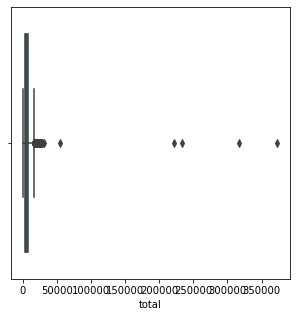

In [15]:
plt.figure(figsize=(5,5))
sns.boxplot(data["total"])

In [16]:
# Since we found so many outliers let's remove these outliers

In [17]:
q1= data["total"].quantile(0.25)
q3= data["total"].quantile(0.75)

IQR= q3-q1

In [18]:
IF = q1 - (1.5 * IQR)
OF = q3 + (1.5 * IQR)

In [19]:
df = data[~((data["total"] < IF) | (data["total"] > OF))]
df.shape

(5815, 12)

In [20]:
df.head()

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,acept,furnished,0.0,8000,1000.0,121,9121
1,0,64,2,1,1,acept,not furnished,540.0,820,122.0,11,1493
2,1,443,5,5,4,acept,furnished,4172.0,7000,1417.0,89,12680
3,1,73,2,2,1,acept,not furnished,700.0,1250,150.0,16,2116
4,1,19,1,1,0,not acept,not furnished,0.0,1200,41.0,16,1257


In [21]:
print("Before Outlier Removal")
print("No. of Rows : ",data.shape[0])
print("No. of Columns : ",data.shape[1])
print("============================================")
print("After Outlier Removal")
print("No. of Rows : ",df.shape[0])
print("No. of Columns : ",df.shape[1])
print("============================================")
print("Total Rows Removed : ",6080-5815)

Before Outlier Removal
No. of Rows :  6080
No. of Columns :  12
After Outlier Removal
No. of Rows :  5815
No. of Columns :  12
Total Rows Removed :  265


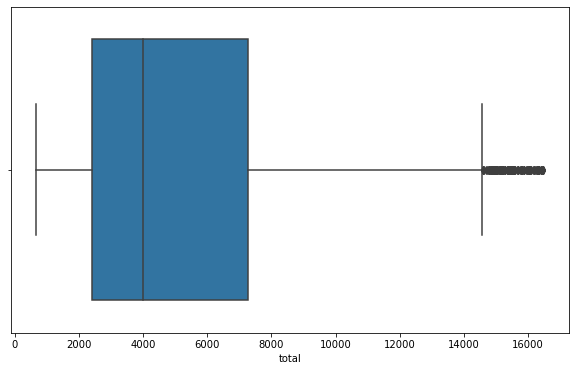

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(df["total"])

In [235]:
# Check how the outliers affect the dataset

Text(0, 0.5, 'Total Cost')

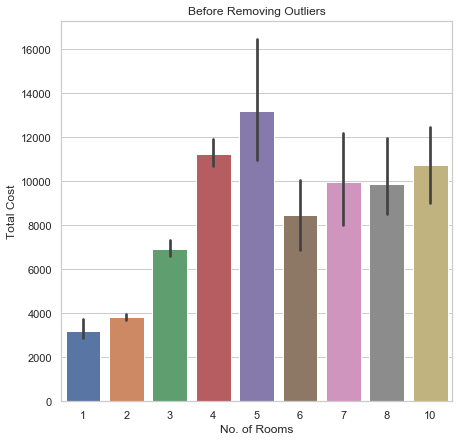

In [236]:
plt.figure(figsize=(7,7))
sns.set(style="whitegrid")
f= sns.barplot(x="rooms",y="total",data=data)
plt.title("Before Removing Outliers")
plt.xlabel("No. of Rooms")
plt.ylabel("Total Cost")

Text(0, 0.5, 'Total Cost')

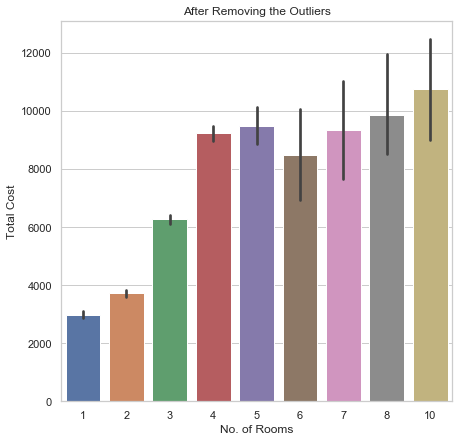

In [237]:
plt.figure(figsize=(7,7))
sns.set(style="whitegrid")
sns.barplot(x="rooms",y="total",data=df)
plt.title("After Removing the Outliers")
plt.xlabel("No. of Rooms")
plt.ylabel("Total Cost")

In [238]:
data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'animal',
       'furniture', 'hoa', 'rent amount', 'property tax', 'fire insurance',
       'total'],
      dtype='object')

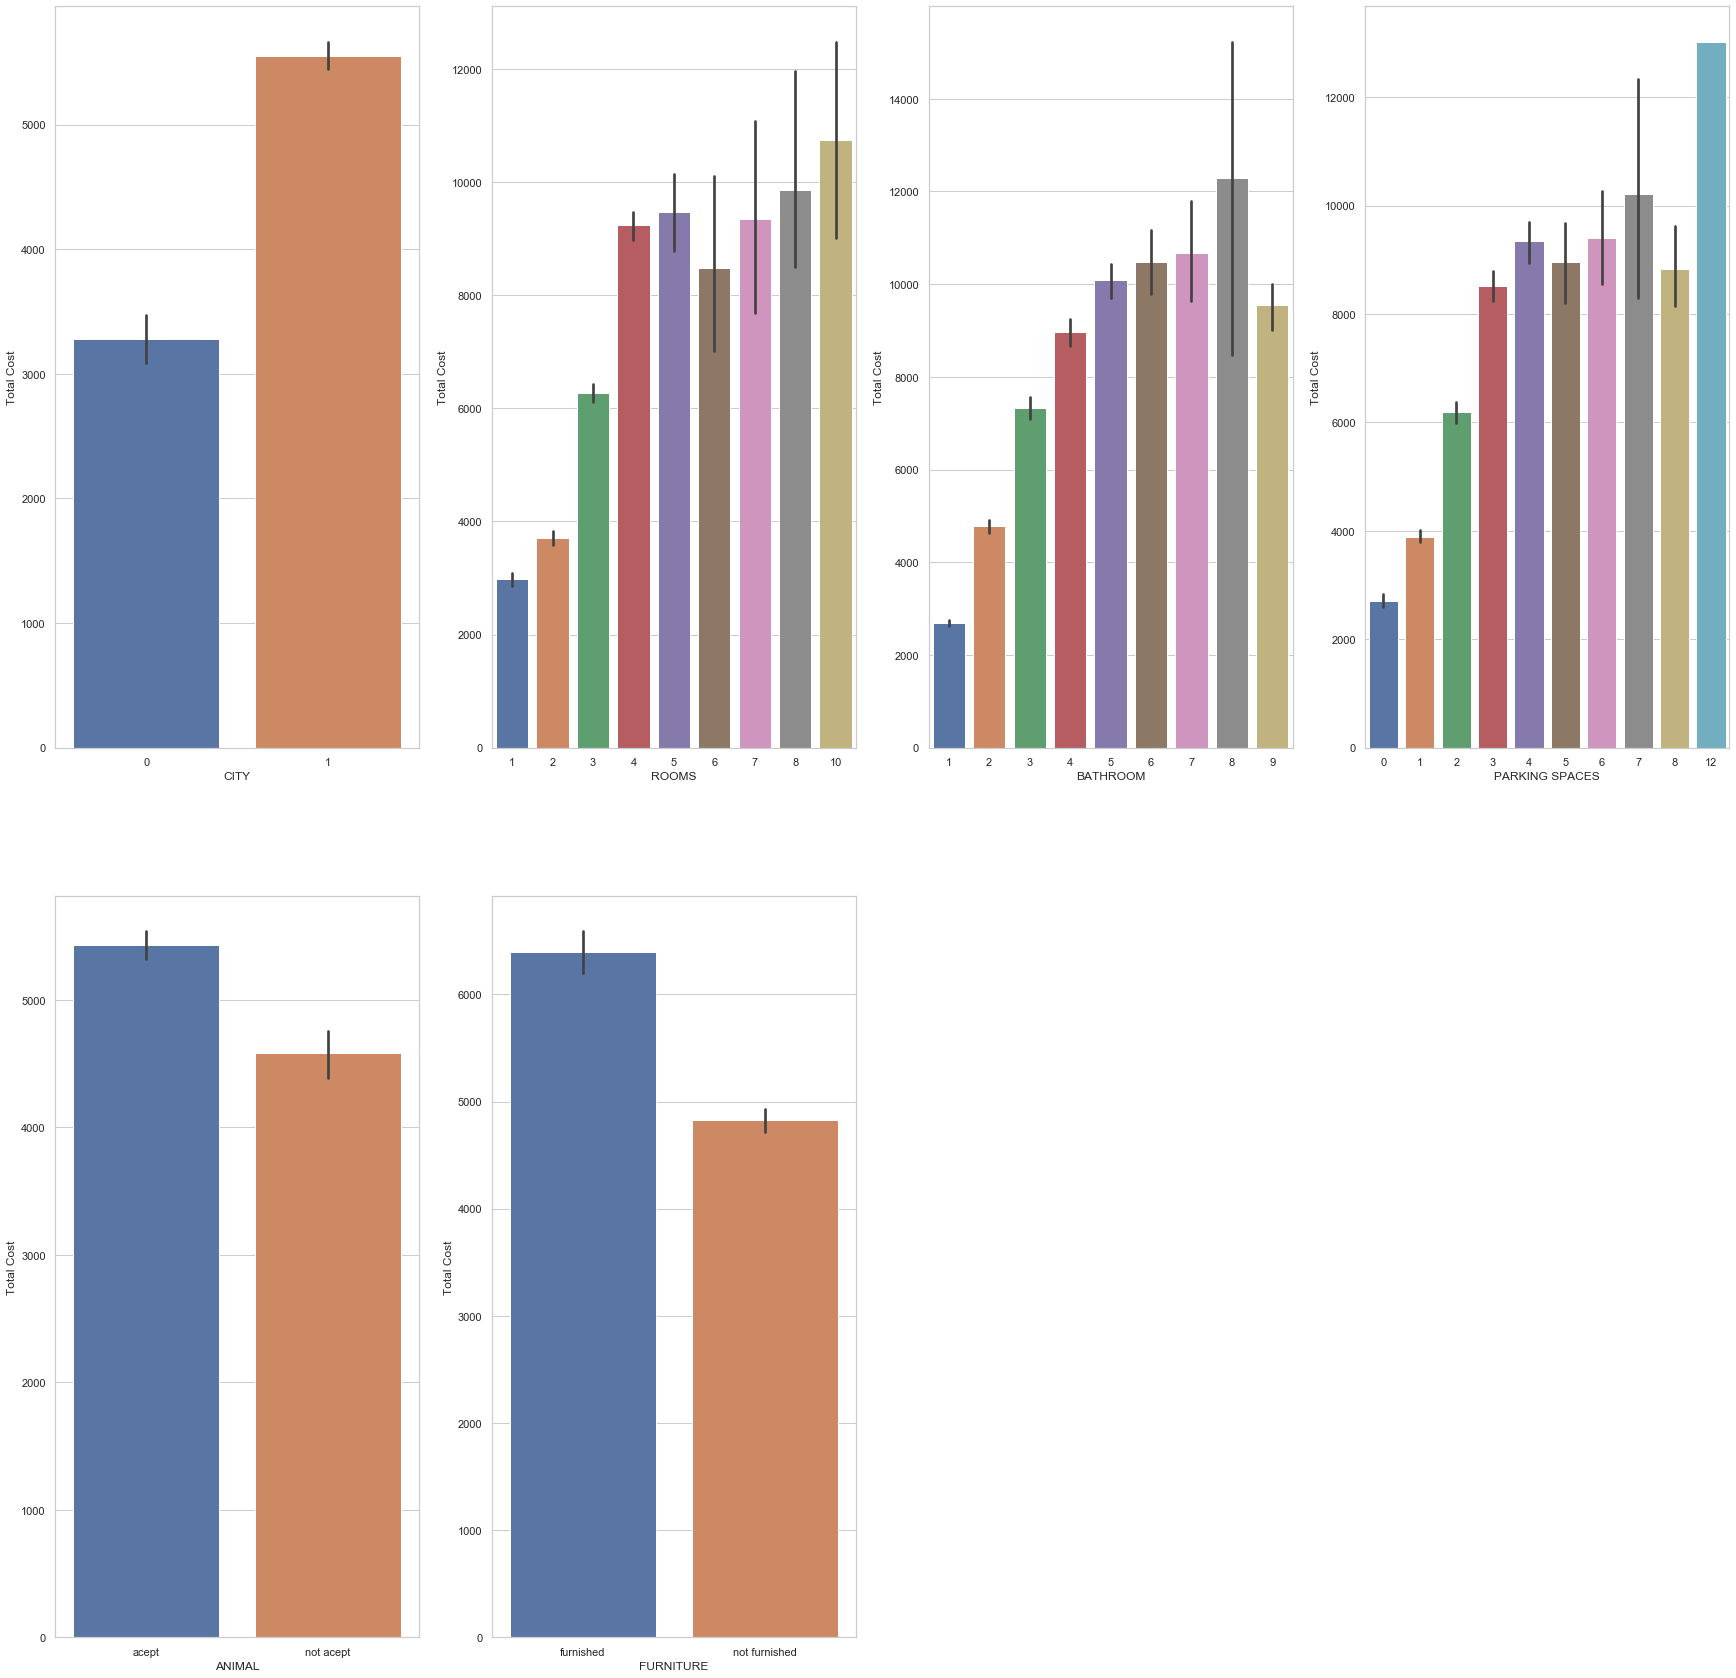

In [239]:
columns=["city","rooms","bathroom","parking spaces","animal","furniture"]
plt.figure(figsize=(30,30))
for i,var in enumerate(columns,1):
    plt.subplot(2,4,i)
    f= sns.barplot(x= df[var],y=df["total"])
    f.set_xlabel(var.upper())
    f.set_ylabel("Total Cost")

In [240]:
# INSIGHTS:

# Cost is more for houses present in city
# Cost is more for houses which is furnished and accepts pets
# Increasing in room, parkking spaces and bathrooms house cost is also increases

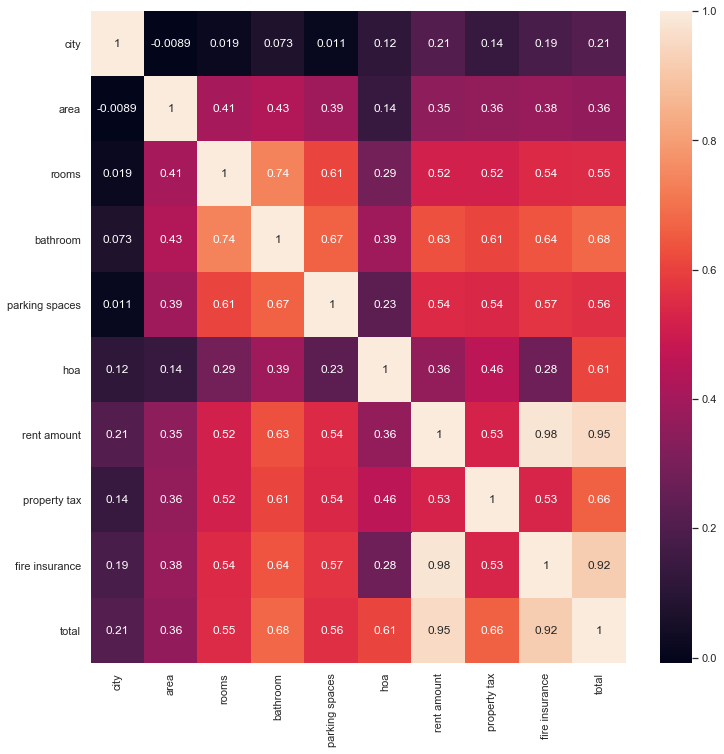

In [241]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [242]:
#Checking Normality

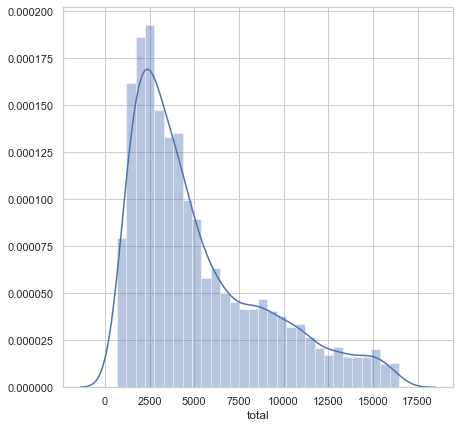

In [243]:
plt.figure(figsize=(7,7))
sns.set(style="whitegrid")
f= sns.distplot(df["total"])

In [244]:
from sklearn.preprocessing import LabelEncoder

In [245]:
lb= LabelEncoder()

In [246]:
df["animal"]= lb.fit_transform(df["animal"])
df["furniture"]= lb.fit_transform(df["furniture"])

c:\python3.6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\python3.6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [247]:
df["animal"].value_counts()

0    4446
1    1369
Name: animal, dtype: int64

In [248]:
df["hoa"] = data["hoa"].fillna(df["hoa"].median())
df["property tax"] = df["property tax"].fillna(df["property tax"].median())

c:\python3.6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\python3.6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [249]:
X= df.drop("total",axis=1)
y= df["total"]

In [250]:
X.head()

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance
0,1,240,3,3,4,0,0,0.0,8000,1000.0,121
1,0,64,2,1,1,0,1,540.0,820,122.0,11
2,1,443,5,5,4,0,0,4172.0,7000,1417.0,89
3,1,73,2,2,1,0,1,700.0,1250,150.0,16
4,1,19,1,1,0,1,1,0.0,1200,41.0,16


In [251]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [252]:
from sklearn.preprocessing import StandardScaler

In [253]:
sc= StandardScaler()

In [254]:
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [270]:
from sklearn.ensemble import RandomForestRegressor

In [271]:
rb= RandomForestRegressor(n_jobs=-1)

In [272]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [276]:
param_dict= {"max_depth":[3,5,10,None],
           "n_estimators":[20,50,100,200,300,500],
           "max_features":randint(1,3),
           "bootstrap":[True,False],
           "min_samples_leaf":randint(1,4)}

In [277]:
randomized_search= RandomizedSearchCV(rb,
                                     param_distributions= param_dict,
                                     n_jobs=-1,
                                     cv=10,
                                     n_iter=40)

In [278]:
randomized_search.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                  

In [279]:
randomized_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 1,
 'n_estimators': 50}

In [280]:
rb1= RandomForestRegressor(n_estimators=50,max_features=2,min_samples_leaf=1,max_depth=None,bootstrap=True)

In [284]:
rb1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [286]:
rb1.score(X_test,y_test)*100

98.42745248640227